Oleksandra Mykhailova,
Agata Kozioł,
Mikita Charniakou

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from IPython.display import Markdown as md
%matplotlib inline 

Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?taskId=3281

In [ ]:
df_raw = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)

# Preprocessing

### Data description

In [ ]:
df_raw

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
df_raw.shape

(5110, 11)

In [ ]:
md("In the data there are {} observations and {} variables".format(df_raw.shape[0], df_raw.shape[1]))

In the data there are 5110 observations and 11 variables

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


Variables can be categorized into following types: 
- gender: object: Male/Female/Other [Nominal]
- age: float [Continuous]
- hypertension: int: 0/1 [Discrete]
- heart_disease: int: 0/1 [Discrete]
- ever_married: object: Yes/No [Nominal]
- work_type: object: Private/Self-employed/children/Govt_job/Never_worked [Nominal]
- Residence_type: object: Urban/Rural [Nominal]
- avg_glucose_level: float [Continous]
- bmi: float [Continous]
- smoking_status: object: Unknown/never smoked/formerly smoked/smokes [Nominal]
- stroke: int: 0/1 [Discrete]

In [ ]:
df_raw['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Data visualization

#### Our target

In [ ]:
target_count = df_raw['stroke'].value_counts()
print(target_count)
print()
print('Percentage of strokes [1]:', np.round(100*target_count[1] / target_count.sum(),2), '%')

0    4861
1     249
Name: stroke, dtype: int64

Percentage of strokes [1]: 4.87 %


As we can see we have very imbalanced data. We will have to keep it in mind

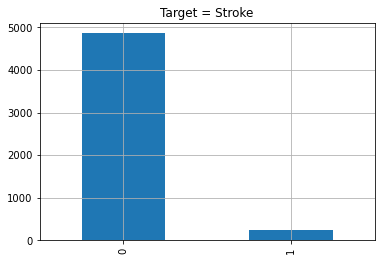

In [ ]:
target_count.plot(kind='bar')
plt.title('Target = Stroke')
plt.grid()
plt.show()

#### Features

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

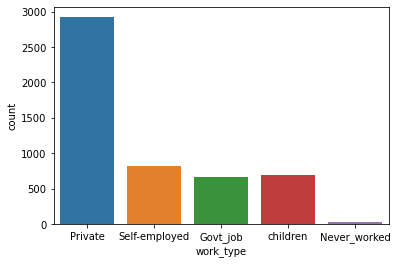

In [ ]:
sns.countplot(df_raw['work_type'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

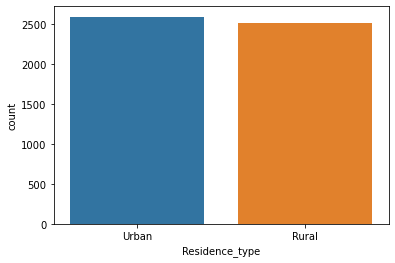

In [ ]:
sns.countplot(df_raw['Residence_type'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

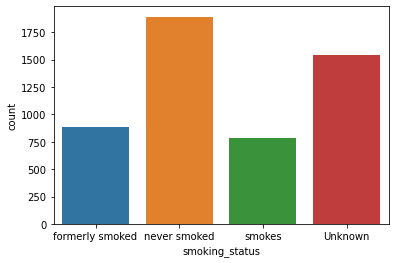

In [ ]:
sns.countplot(df_raw['smoking_status'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

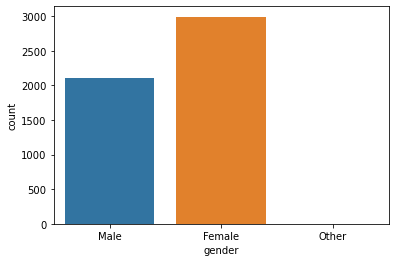

In [ ]:
sns.countplot(df_raw['gender'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

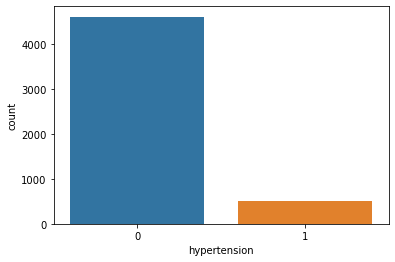

In [ ]:
sns.countplot(df_raw['hypertension'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

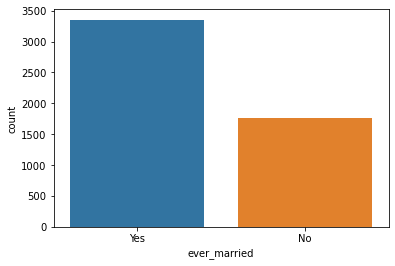

In [ ]:
sns.countplot(df_raw['ever_married'])

#### Handling missing values

In [ ]:
df_raw.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
md("There are {} missing values for BMI variable, which is around {}% of all BMI observations ".format(df_raw.isnull().sum()['bmi'], round((df_raw.isnull().sum()['bmi']/df_raw.shape[0])*100,2)))

There are 201 missing values for BMI variable, which is around 3.93% of all BMI observations 

In [ ]:
df_raw['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
md("There are {} 'Other' values for gender variable, which is around {}% of all gender observations ".format(df_raw['gender'].value_counts()['Other'], round((df_raw['gender'].value_counts()['Other']/df_raw.shape[0])*100,3)))

There are 1 'Other' values for gender variable, which is around 0.02% of all gender observations 

In [ ]:
df_raw['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
md("There are {} 'Unknown' values for smoking_status variable, which is around {}% of all smoking_status observations ".format(df_raw['smoking_status'].value_counts()['Unknown'], round((df_raw['smoking_status'].value_counts()['Unknown']/df_raw.shape[0])*100, 2)))

There are 1544 'Unknown' values for smoking_status variable, which is around 30.22% of all smoking_status observations 

How to handle missing data:
- 1 'Other' value from gender variable can be deleted
- 201 missing values from BMI variable can be predicted with IterativeImputer
- 1544 'Unknown' values from smoking_status variables cannot be deleted, as it is around 30% of all data. It can be left as it is, so 'Unknown' is a separate category

In [ ]:
df_raw = df_raw.drop(df_raw[df_raw['gender'] == 'Other'].index)

## Removing outliers

The only variables that can have outliers are: 'age', 'avg_glucose_level' and 'bmi'. We have to assess their distribution in order to pick a right way to remove outliers.

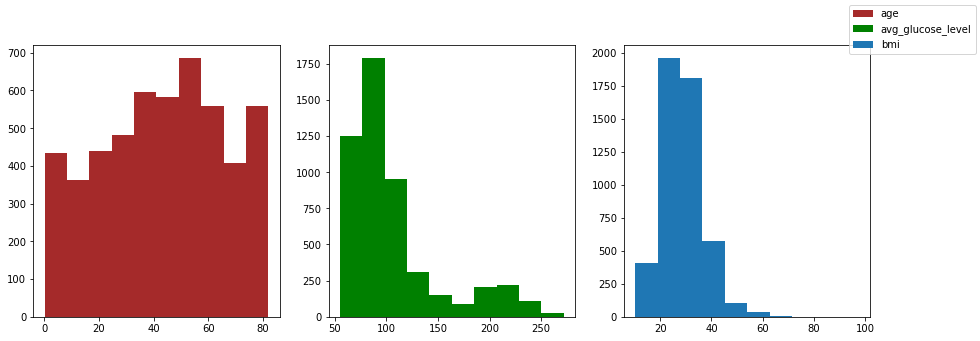

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(df_raw['age'], label = 'age', color = 'brown')
axs[1].hist(df_raw['avg_glucose_level'], label = 'avg_glucose_level', color = 'green')
axs[2].hist(df_raw['bmi'], label = 'bmi')
fig.legend()
plt.show()

As we can see, only 'bmi' variable is close to having normal distribution. Outliers can be removed based on IQR.
In 'age' variable, there are no outliers visible.
'avg_glucose_level' possibly has outliers, but distribution is not normal, so the issue needs to be further explored.

In [ ]:
df_raw['avg_glucose_level'].describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
len(df_raw['avg_glucose_level'][df_raw['avg_glucose_level'] > df_raw['avg_glucose_level'].quantile(0.99)])

52

Max value is twice 3rd quartile, however, the distribution is not normal and we can see that there is a substancial amount of data in the biggest 1%. Therefore we conclude that they are possibly not outliers, just this variable distribution is unique.

#### Removing outliers for BMI

In order to properly recognize outliers now and impute missing values without outliers in the data, we will now create a copy of the dataframe, fill missing values with mean, then detect outliers and remove them on original data.

In [ ]:
df_out = df_raw.copy()
df_out['bmi'].fillna(df_raw['bmi'].mean(),inplace=True)

In [ ]:
def detect_outlier_iqr(dataframe, var_name):
    
    df = dataframe.copy()
    
    Q1=np.quantile(df[var_name], 0.25)
    Q3=np.quantile(df[var_name], 0.75)
    IQR=Q3 - Q1
    
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    
    left_outliers = df[var_name]<lower_bound
    right_outliers = df[var_name]>upper_bound

    df = df[(~left_outliers)&(~right_outliers)]

    return (~left_outliers)&(~right_outliers)

def plot_outlier_iqr(dataframe, var_name):
    
    df = dataframe.copy()
        
    df[var_name].hist(bins=50)
    
    Q1=np.quantile(df[var_name], 0.25)
    Q3=np.quantile(df[var_name], 0.75)
    IQR=Q3 - Q1
    
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    
    print("Lower bound:", lower_bound)
    print("Upper bound:", upper_bound)    
    
    plt.axvline(x=lower_bound, color='red', linestyle='--')
    plt.axvline(x=upper_bound, color='red', linestyle='--')
    
    plt.show()
    
    left_outliers = df[var_name]<lower_bound
    right_outliers = df[var_name]>upper_bound
    print(f"Number of left-side outliers based on IQR in {var_name}:", left_outliers.sum())
    print(f"Number of right-side outliers based on IQR in {var_name}:", right_outliers.sum())
    df = df[(~left_outliers)&(~right_outliers)]

    return df

Lower bound: 10.300000000000006
Upper bound: 46.29999999999999


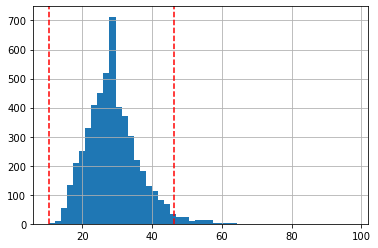

Number of left-side outliers based on IQR in bmi: 1
Number of right-side outliers based on IQR in bmi: 125


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0


In [ ]:
plot_outlier_iqr(df_out, 'bmi')

Now we can remove outliers from original data

In [ ]:
df_no_out = df_raw[detect_outlier_iqr(df_out, 'bmi')]
df_no_out

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


Outliers in BMI were removed and we have 4983 observations

## Preprocessing pipeline

We picked the best preprocessing model in another notebook already, so here we implement only one

In [ ]:
df_no_out

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


Now we will use a preprocessing pipeline that will via One-Hot-Encoder transform nominal values to binary and impute missing BMI data with IterativeImputer. Smoking status, due to its ordinal nature, we will use OrdinalEncoder. Numeric variables (age, avg_glucose_level and bmi will be scaled with MinMaxScaler

In [ ]:
train, test = train_test_split(df_no_out, test_size=0.3, random_state=42)
categorical_features = ['gender', 'ever_married', 'Residence_type', 'work_type']
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'error', drop = 'first'))
    ]
)

imputer_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'] #Here we impute missing values for bmi
imputer_transformer = Pipeline(
    [
        ('imputer_num', IterativeImputer()),
    ]
)

ordinal_transformer = Pipeline(
    [
        ('ordinal', OrdinalEncoder(categories=[['never smoked', 'formerly smoked', 'smokes', 'Unknown']])),
    ]
)
preprocessor = ColumnTransformer(
    [
        ('imputer', imputer_transformer, imputer_features),
        ('ordinal', ordinal_transformer, ['smoking_status']),
        ('categoricals', categorical_transformer, categorical_features)
    ],
    remainder = 'passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer',
                                 Pipeline(steps=[('imputer_num',
                                                  IterativeImputer())]),
                                 ['age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['never '
                                                                              'smoked',
                                                                              'formerly '
                                                                              'smoked',
                                                                              'smokes',
                                                                              'Unknown']]))

Now we transform NumPy array into DataFrame.

In [ ]:
train = preprocessor.fit_transform(train)
test = preprocessor.transform(test)

cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'stroke']

train= pd.DataFrame(train)
test = pd.DataFrame(test)
train.columns = cols
test.columns = cols

train

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
0,31.0,0.0,0.0,104.55,26.40000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,0.0,0.0,84.86,31.85873,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,27.0,0.0,0.0,226.75,28.90000,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,50.0,0.0,0.0,95.25,24.30000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,25.0,0.0,0.0,103.15,21.00000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,8.0,0.0,0.0,78.48,16.10000,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3484,53.0,0.0,0.0,96.88,31.40000,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3485,33.0,0.0,0.0,70.59,20.20000,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3486,66.0,0.0,0.0,72.53,25.30000,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


We should make sure that missing values in bmi were imputed correctly

Here is bmi distribution in gender before imputation

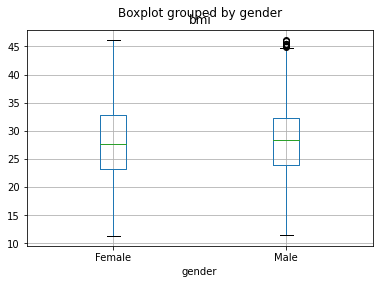

Mean of BMI value for Females:  28.258506075768455
Mean of BMI value for Males:  28.262298387096802
Mean of BMI value:  28.26007946465916


In [ ]:
df_no_out.boxplot(column="bmi",by = "gender")
plt.show()
print("Mean of BMI value for Females: ", np.mean(df_no_out[df_no_out['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(df_no_out[df_no_out['gender'] == 'Male']['bmi']))
print("Mean of BMI value: ", np.mean(df_no_out['bmi']))

And after:

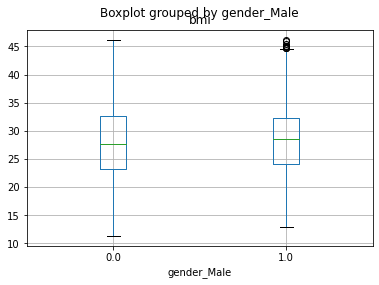

Mean of BMI value for Females:  28.294876634088627
Mean of BMI value for Males:  28.41755481199168
Mean of BMI value:  28.345980817716264


In [ ]:
train.boxplot(column="bmi",by = "gender_Male")
plt.show()
print("Mean of BMI value for Females: ", np.mean(train[train['gender_Male'] == 0]['bmi']))
print("Mean of BMI value for Males: ", np.mean(train[train['gender_Male'] == 1]['bmi']))
print("Mean of BMI value: ", np.mean(train['bmi']))

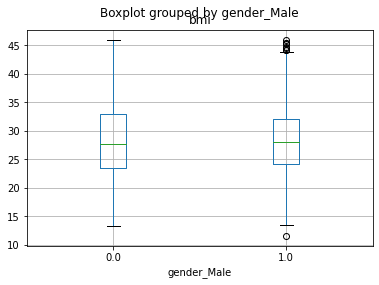

Mean of BMI value for Females:  28.354143431413306
Mean of BMI value for Males:  28.114469274656408
Mean of BMI value:  28.252342033727334


In [ ]:
test.boxplot(column="bmi",by = "gender_Male")
plt.show()
print("Mean of BMI value for Females: ", np.mean(test[test['gender_Male'] == 0]['bmi']))
print("Mean of BMI value for Males: ", np.mean(test[test['gender_Male'] == 1]['bmi']))
print("Mean of BMI value: ", np.mean(test['bmi']))

The distribution hardly changed, so IterativeImputer worked fine.

#### Feature scaling

Now we apply MinMaxScaler to numeric features - age, avg_glucose_level, bmi

In [ ]:
scaler = MinMaxScaler()
train.loc[:, ['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(train.loc[:,['age', 'avg_glucose_level', 'bmi']])
test.loc[:, ['age', 'avg_glucose_level', 'bmi']] = scaler.transform(test.loc[:,['age', 'avg_glucose_level', 'bmi']])
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
0,0.376833,0.0,0.0,0.228188,0.432665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.975562,0.0,0.0,0.137291,0.589075,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.327957,0.0,0.0,0.792309,0.504298,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.608993,0.0,0.0,0.185255,0.372493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.303519,0.0,0.0,0.221725,0.277937,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,0.095797,0.0,0.0,0.107839,0.137536,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3484,0.645650,0.0,0.0,0.192780,0.575931,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3485,0.401271,0.0,0.0,0.071415,0.255014,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3486,0.804497,0.0,0.0,0.080371,0.401146,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing - final remarks

<AxesSubplot:>

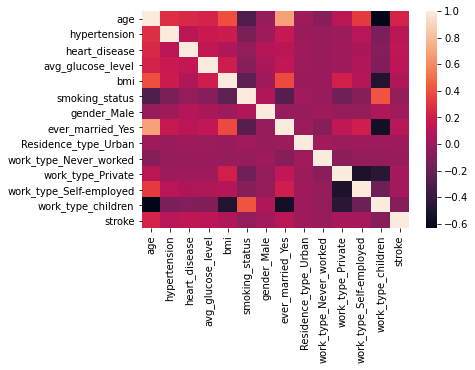

In [ ]:
sns.heatmap(train.corr())

In [ ]:
train.loc[:,['age', 'ever_married_Yes']].corr()

,age,ever_married_Yes
age,1.000000,0.685632
ever_married_Yes,0.685632,1.000000


Correlation between two features, age and ever_married, is around 0.68. This value is not big enough to be a threat

## Dataset transformation

In [ ]:
X_train = train.drop(['stroke'], axis = 1)
X_test = test.drop(['stroke'], axis = 1)
y_train = train.loc[:, 'stroke'] 
y_test = test.loc[:, 'stroke']
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.376833,0.0,0.0,0.228188,0.432665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.975562,0.0,0.0,0.137291,0.589075,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.327957,0.0,0.0,0.792309,0.504298,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.608993,0.0,0.0,0.185255,0.372493,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.303519,0.0,0.0,0.221725,0.277937,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,0.095797,0.0,0.0,0.107839,0.137536,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3484,0.645650,0.0,0.0,0.192780,0.575931,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3485,0.401271,0.0,0.0,0.071415,0.255014,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3486,0.804497,0.0,0.0,0.080371,0.401146,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


Our target variable is highly imbalanced. We have to pick a resampling method in order to obtain satisfying results

#### SMOTE_NC

In [ ]:
smote_nc = SMOTENC(categorical_features=[1, 2, 5, 6, 7, 8, 9, 10, 11, 12], random_state=42)
X_smote, y_smote = smote_nc.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts(normalize=True) * 100

Shape of X before SMOTE: (3488, 13)
Shape of X after SMOTE: (6654, 13)

Balance of positive and negative classes (%):


0.0    50.0
1.0    50.0
Name: stroke, dtype: float64

#### Validation test split

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Feature selection

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000))

In [ ]:
sel.get_support()

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')


In [ ]:
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)
rfc.feature_importances_

array([2.38353493e-01, 2.66936672e-02, 2.38076566e-02, 2.74087881e-01,
       2.47938490e-01, 6.61266232e-02, 2.96970171e-02, 1.98285493e-02,
       3.10026733e-02, 1.05546260e-05, 2.36643469e-02, 1.76114540e-02,
       1.17759347e-03])

In [ ]:
cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children']
features = cols
for feature in zip(features, rfc.feature_importances_):
    print(feature)

('age', 0.2383534934478435)
('hypertension', 0.02669366719383345)
('heart_disease', 0.023807656555089637)
('avg_glucose_level', 0.2740878811318811)
('bmi', 0.24793848981133979)
('smoking_status', 0.06612662316957725)
('gender_Male', 0.029697017121109757)
('ever_married_Yes', 0.019828549321750835)
('Residence_type_Urban', 0.03100267329555576)
('work_type_Never_worked', 1.055462603681882e-05)
('work_type_Private', 0.023664346900288673)
('work_type_Self-employed', 0.01761145395984966)
('work_type_children', 0.0011775934658437607)


<BarContainer object of 13 artists>

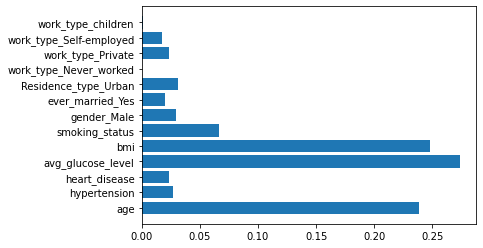

In [ ]:
plt.barh(features, rfc.feature_importances_)

As we can see, features with the biggest importance are: bmi, avg_glucose_level and age. However, all scores are below 0.3, so we will include all features.

# Model selection

In [ ]:
models = {
        'GaussianNB': GaussianNB(),
        'LogisticRegression': LogisticRegression(),
        'RandomForestClassifier': RandomForestClassifier(),
        'SupportVectorMachine': SVC(),
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'KNeighborsClassifier': KNeighborsClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'Stochastic Gradient Descent':  SGDClassifier(random_state = 42),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'XGBClassifier': XGBClassifier()
    }

modelNames = ['GaussianNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
                 'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
                 'Stochastic Gradient Descent', 'AdaBoostClassifier', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
        model = models[m]
        model.fit(X_smote, y_smote)
        score = model.score(X_val, y_val)
    
        print(f'{m}') 
        train_score = model.score(X_smote, y_smote)
        print(f'Train score of trained model: {train_score*100}')
        trainScores.append(train_score*100)
        

        validation_score = model.score(X_val, y_val)
        print(f'Validation score of trained model: {validation_score*100}')
        validationScores.append(validation_score*100)

        test_score = model.score(X_test, y_test)
        print(f'Test score of trained model: {test_score*100}')
        testScores.append(test_score*100)
        print(" ")
    
        y_predictions = model.predict(X_test)
        auc = roc_auc_score(y_test, y_predictions)
        conf_matrix = confusion_matrix(y_test, y_predictions)

        print(f'Confussion Matrix: \n{conf_matrix}\n')
        print(classification_report(y_test, y_predictions))

        for m in range (1):
            current = modelNames[m]
            modelNames.remove(modelNames[m])

            preds = model.predict(X_test)
            confusion_matr = confusion_matrix(y_test, preds)
            print("############################################################################")
            print("")
            print("")
            print("")

GaussianNB
Train score of trained model: 65.94529606251879
Validation score of trained model: 38.152610441767074
Test score of trained model: 39.97326203208556
 
Confussion Matrix: 
[[262 445]
 [  4  37]]

              precision    recall  f1-score   support

         0.0       0.98      0.37      0.54       707
         1.0       0.08      0.90      0.14        41

    accuracy                           0.40       748
   macro avg       0.53      0.64      0.34       748
weighted avg       0.94      0.40      0.52       748

############################################################################



LogisticRegression
Train score of trained model: 78.11842500751428
Validation score of trained model: 71.8875502008032
Test score of trained model: 71.65775401069519
 
Confussion Matrix: 
[[508 199]
 [ 13  28]]

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83       707
         1.0       0.12      0.68      0.21        41

    accurac

C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
Train score of trained model: 99.63931469792607
Validation score of trained model: 89.95983935742971
Test score of trained model: 90.9090909090909
 
Confussion Matrix: 
[[675  32]
 [ 36   5]]

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       707
         1.0       0.14      0.12      0.13        41

    accuracy                           0.91       748
   macro avg       0.54      0.54      0.54       748
weighted avg       0.90      0.91      0.91       748

############################################################################





We picked the best model in another notebook, so here we present only one, with the best results

### GridSearchCV: LogisticRegression

In [ ]:
param_grid = [
    {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}]

lg = LogisticRegression()

clf = GridSearchCV(lg, param_grid = param_grid, scoring = 'recall', cv = 5, n_jobs=-1)

clf.fit(X_smote, y_smote)
clf.best_params_
    
y_pred = clf.predict(X_test)
    
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    
train_score = clf.score(X_smote, y_smote)
print(f'Train score of trained model: {train_score*100}')  
    
validation_score = clf.score(X_val, y_val)
print(f'Validation score of trained model: {validation_score*100}')
    
test_score = clf.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')
print(" ")
    
print(classification_report(y_test, y_pred))

ROC_AUC: 0.7312933383930728
Confusion matrix: 
[[465 242]
 [  8  33]]
Train score of trained model: 89.5701833483619
Validation score of trained model: 90.9090909090909
Test score of trained model: 80.48780487804879
 
              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79       707
         1.0       0.12      0.80      0.21        41

    accuracy                           0.67       748
   macro avg       0.55      0.73      0.50       748
weighted avg       0.94      0.67      0.76       748



These are the best results we were able to get. We were aiming at increasing recall in order to minimize False Negatives in stroke patients. 0.80 recall for stroke: 1.0 is solid, but it could be improved. 
Train/test scores are similar enough to conclude that the model is not overfitted.

The weak points of our dataset is huge target imbalance and very small feature-target correlation. This is probably the reason why our best model has ROC_AUC: 0.73, which is not the best, and test score: 80%.